In [4]:
import pandas as pd
import matplotlib.pyplot as plt

SalesLog = pd.read_csv('~/aiffel/data_analysis_basic/data/Sales.csv')
SalesLog

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325
...,...,...,...,...,...,...
99840,2022-03-27,2022-03-27,SoccerManager,install,0,dicta630
99841,2022-03-28,2022-03-28,SoccerManager,install,0,tempora976
99842,2022-03-26,2022-03-26,SoccerManager,install,0,iusto840
99843,2022-03-20,2022-03-20,SoccerManager,install,0,nemo273


In [5]:
SalesLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [6]:
SalesLog['Payment'].sum()

144443100

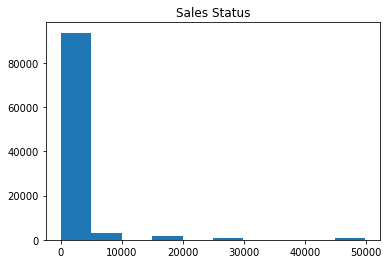

In [8]:
plt.hist(SalesLog['Payment'])
plt.title('Sales Status')
plt.show()

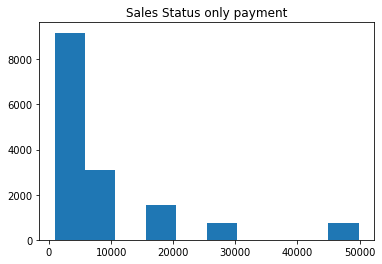

In [12]:
Sales = SalesLog[SalesLog['Payment']!=0]
plt.hist(Sales['Payment'])
plt.title('Sales Status only payment')
plt.show()

In [13]:
Sales['Payment'].describe(
)

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

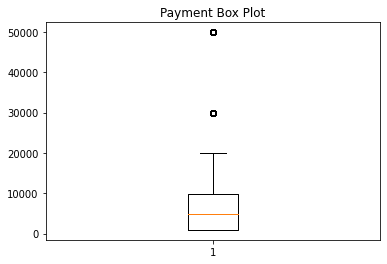

In [14]:
plt.boxplot(Sales['Payment'])
plt.title('Payment Box Plot')
plt.show()

In [15]:
Sales['Payment'].value_counts()/len(Sales['Payment'])

900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: Payment, dtype: float64

In [16]:
SalesLog['Month'] = SalesLog['Time_stamp'].str[:7]
#해당 문자열의 처음부터 7번째 위치까지를 추출하여 'Month' 열에 할당합니다. 
#이렇게 하면 'Month' 열에는 'YYYY-MM' 형식의 연도와 월 정보가 저장

SalesLog['Payment'].groupby(SalesLog['Month']).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

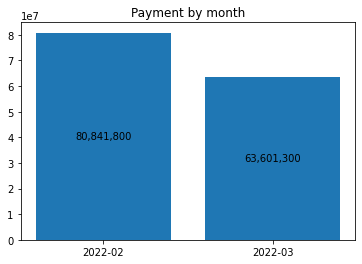

In [19]:
temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax,labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payment by month')
plt.show()
#리스트 컴프리헨션을 사용하여 각 데이터 값을 포맷팅하여 레이블로 만들고 있습니다. 
#{x:,.0f} 형식은 숫자를 천 단위로 끊어진 쉼표로 포맷하고 소수점 이하를 제거하는 형식입니다.

In [23]:
Sales02 = SalesLog[(SalesLog['Month'] == '2022-02') & (SalesLog['Payment']!=0)]
Sales02

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
12168,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
12169,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
12170,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
12171,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


In [26]:
Sales02.reset_index(drop=True) #index column Drop

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
8537,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
8538,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
8539,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
8540,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


<function matplotlib.pyplot.show(close=None, block=None)>

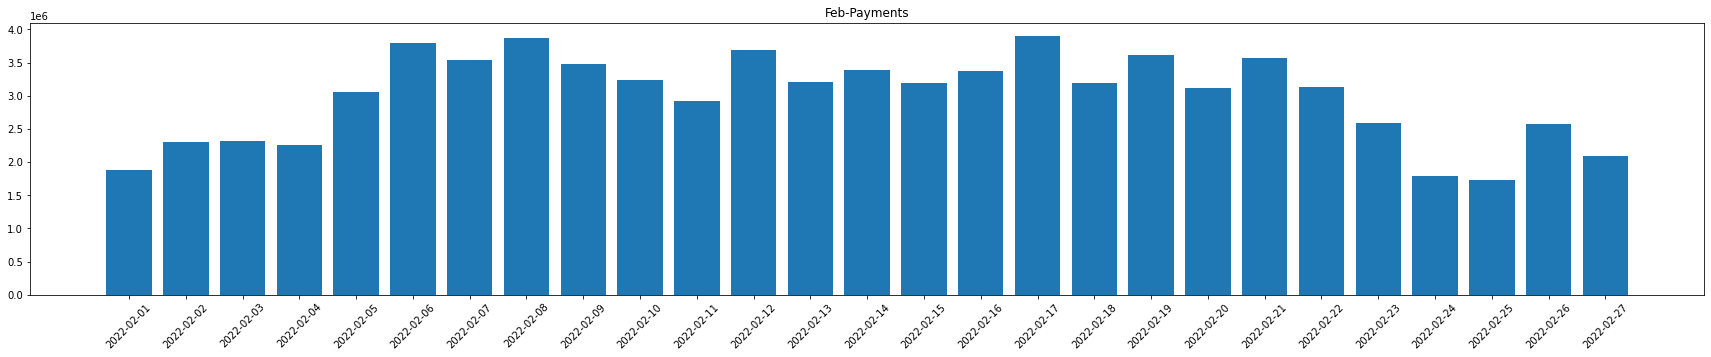

In [29]:
temp_data = Sales02['Payment'].groupby(Sales02['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

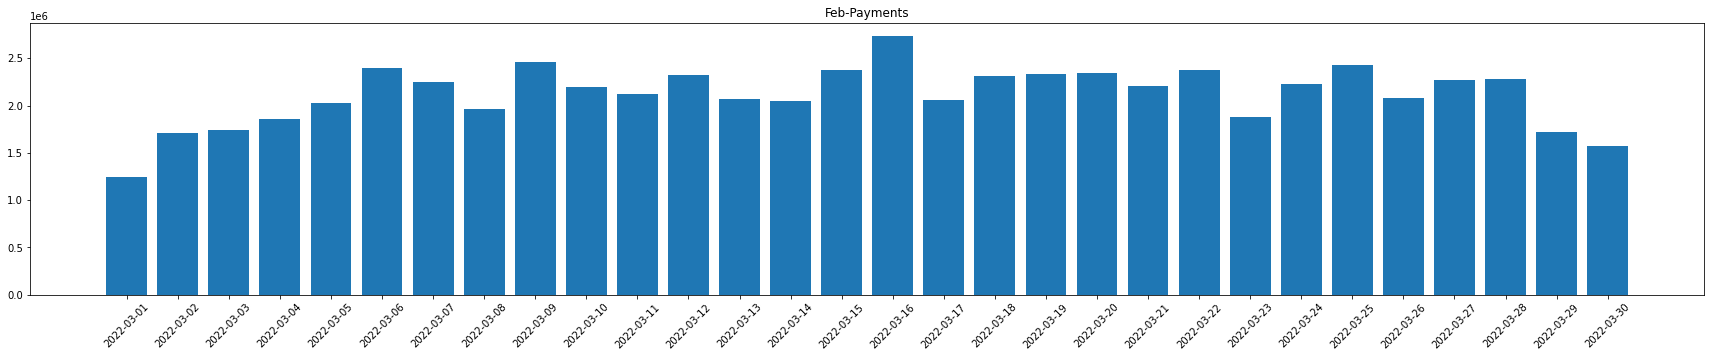

In [48]:
Sales03 = SalesLog[(SalesLog['Month'] == '2022-03') & (SalesLog['Payment']!=0)]
Sales03
temp_data = Sales03['Payment'].groupby(Sales03['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45)
plt.show

In [35]:
CustomerLog = pd.read_csv('~/aiffel/data_analysis_basic/data/customer.csv')
print(CustomerLog)

CustomerLog.info()

          Customer_ID Name     Nickname  Password  \
0          facilis140  이영순         quos  ********   
1          debitis994  김중수    molestiae  ********   
2         possimus246  양은경          rem  ********   
3        occaecati138  백도윤       libero  ********   
4         corrupti325  김영수   temporibus  ********   
...               ...  ...          ...       ...   
99840        dicta630  김예지          sit  ********   
99841      tempora976  문은경         modi  ********   
99842        iusto840  강중수        iusto  ********   
99843         nemo273  황정남     deleniti  ********   
99844  consequatur371  이영식  accusantium  ********   

                              Email       Birth  Gender              C.P.  \
0                   coejongsu@yu.kr  1989-03-11  female  01x9-4x625-x5x3x   
1                   jiweon02@ju.org  1995-11-19    male  01x9-3x228-x3x9x   
2           coesubin@jusighoesa.com  2005-12-24  female  01x9-7x873-x2x2x   
3            yeongceol80@gangryu.kr  2003-02-09  female

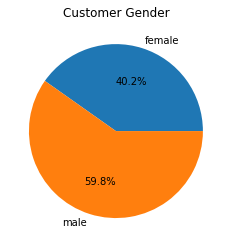

In [55]:
# Customer 데이터와 Sales 데이터를 결합하기
TotalData = pd.merge(CustomerLog, SalesLog)

# 결제 경험이 있는 고객들만 골라내기
PaymentCustomer = TotalData[(TotalData["Payment"] != 0)]

pie_data = CustomerLog.groupby(['Gender']).count().Name
plt.pie(pie_data, labels = pie_data.index, autopct = '%1.1f%%')
plt.title('Customer Gender')
plt.show()

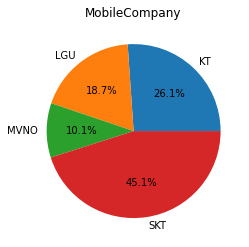

In [58]:
pie_data = CustomerLog.groupby(['MobileCompany']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('MobileCompany')
plt.show()

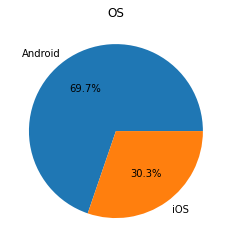

In [59]:
pie_data = CustomerLog.groupby(['OS']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('OS')
plt.show()

0         4900
1        29900
2         4900
3          900
4          900
         ...  
15304     9900
15305     9900
15306      900
15307     4900
15308     4900
Name: Payment, Length: 15309, dtype: int64


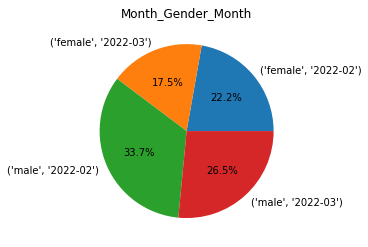

In [63]:
# sum() 함수는 판다스 데이터프레임에서 특정 열의 값을 합산하는 역할을 합니다. 
# 코드 내에서 PaymentCustomer['Payment'] 열을 그룹화한 후 sum() 함수를 호출하여 각 그룹의 결제 금액을 합산하고 있습니다.

# 먼저, groupby() 메서드를 사용하여 데이터를 그룹화합니다. 
# PaymentCustomer['Gender']와 PaymentCustomer['Month']를 기준으로 그룹화하고, 
# 이후 ['Payment'] 열을 선택하여 해당 그룹의 결제 금액 데이터를 가져옵니다. 
# 그 다음 sum() 함수를 호출하여 그룹별 결제 금액을 합산합니다.

pie_data = PaymentCustomer['Payment'].groupby([PaymentCustomer['Gender'],PaymentCustomer['Month']]).sum()
# print(PaymentCustomer['Payment'])
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Month_Gender_Month')
plt.show()

In [66]:
# 판다스에서 조건을 활용하여 특정 조건을 만족하는 데이터를 선택하려면 대괄호([])를 사용해야 합니다.
# 소괄호(())는 데이터프레임을 함수나 연산의 일부로 사용할 때 주로 사용됩니다. 예를 들어, 그룹화나 계산을 수행할 때 소괄호
# Hint! '=='를 사용해 봅시다.
# [[YOUR CODE]]

male = PaymentCustomer[PaymentCustomer['Gender']=='male']
female =PaymentCustomer[PaymentCustomer['Gender']=='female']

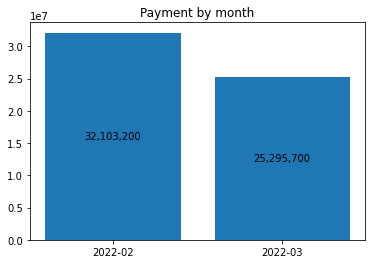

In [67]:
# [[YOUR CODE]]
temp_data = female['Payment'].groupby(female['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax,labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payment by month')
plt.show()

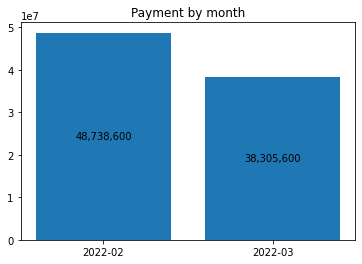

In [68]:
# [[YOUR CODE]]
temp_data = male['Payment'].groupby(male['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax,labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payment by month')
plt.show()

SyntaxError: unexpected EOF while parsing (8895245.py, line 1)